# Direct Plotting

In [61]:
# Setting tampilan layar
# Setting ukuran grafik yang akan di tampilkan
import matplotlib.pyplot as plt  # Untuk menampikan grafik 
plt.rcParams["figure.figsize"] = (20,6)  

In [2]:
# Kami akan membuat vektor variabel yang sama 
# Star of reading dataset

import pandas as pd  # Digunakan saat melibatkan dataframe
import numpy as np   # Digunakan oparsional matematics
dataset = pd.read_csv('Salaries.csv') # Dataset di berinama 'dataset'


In [3]:
# Melihat Struktur Tabel yg ada
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [4]:
# Menampilkan sekilas isi dataset
dataset.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


+ Data type 'categorycal' diantaranya :
    + rank
    + discipline
    + sex

+ Selebihnya berupa data type 'numeric'

In [5]:
# Kita buat vector 'variables' utuk semua feature tersebut, untuk memahami apa itu vector lihat tutorial berikut :
rank = dataset['rank']
discipline = dataset['discipline']
phd = dataset['phd']
service = dataset['service']
sex = dataset['sex']
salary = dataset['salary']

# Line Plot

<AxesSubplot:>

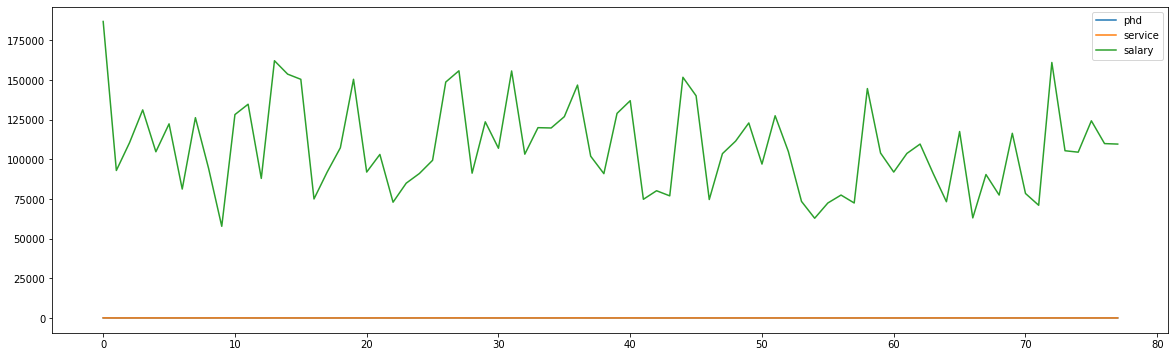

In [6]:
# Visualize pattern with High Difference in Numerical
dataset[['rank','discipline','phd','service','sex','salary']].plot() # data yg akan display harus harus dalam bentuk tuple

+ Kita bisa amati hubungan/correlation antara feature 'phd'  dan 'service' sepenjang tahun berjalan

<AxesSubplot:>

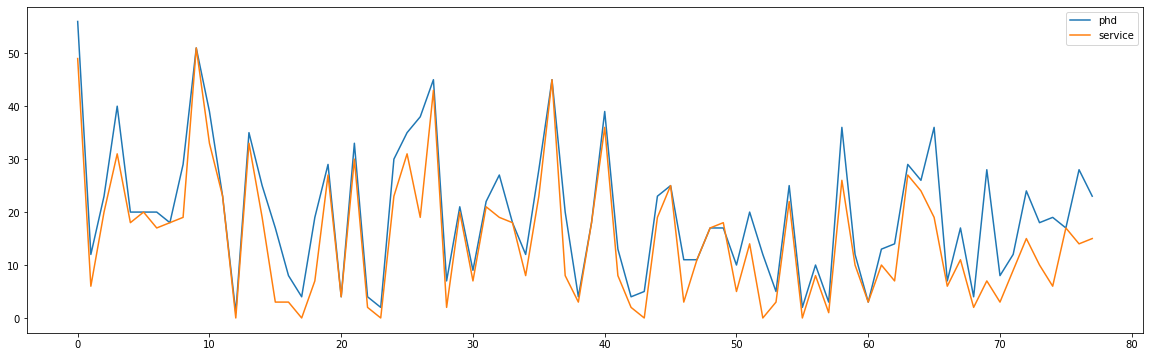

In [8]:
# Visualizing pattern more close Numerical Unit terkait phd vs services
dataset[['phd','service']].plot()

In [9]:
# Anda dapat membuat pengelompokan dataset baru berdasarkan 'service'
dataset1 = dataset.groupby(['service']).sum()

# Serta anda dapat men-summarizing/sorrting value Pendapatan-gaji per service category
dataset1.sort_values("salary", ascending=False, inplace=True)



In [10]:
# Tampilkan data tersebut 'dataset1'
dataset1.head()

,phd,salary
service,,
19,178,769448
3,56,635216
18,91,603060
0,26,519500
7,70,440408


+ Gaji akumulasi tertinggi dari masa kerja 19 tahun

<AxesSubplot:xlabel='service'>

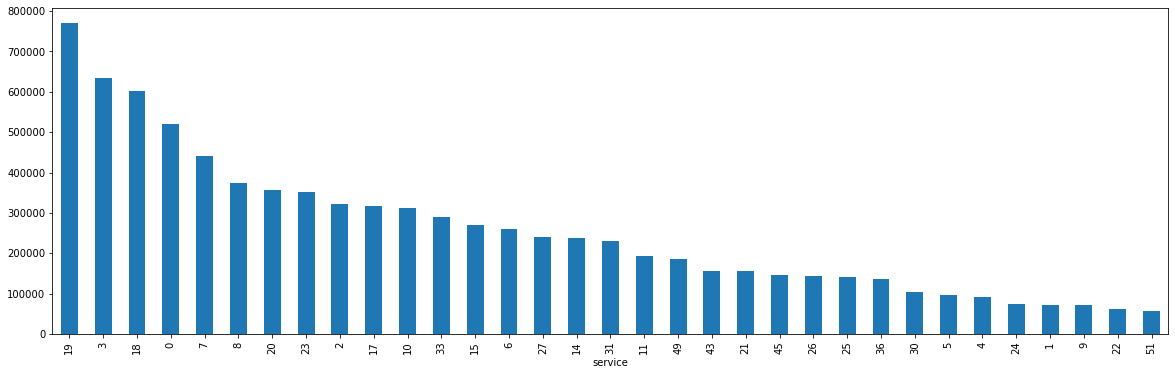

In [11]:
# kita buat plotting grafik agar lebih menvisualizing

dataset1['salary'].plot.bar()

+ Anda dapat melihat kebanyakan orang melayani sekitar 19 tahun

# Bar Plot

<AxesSubplot:>

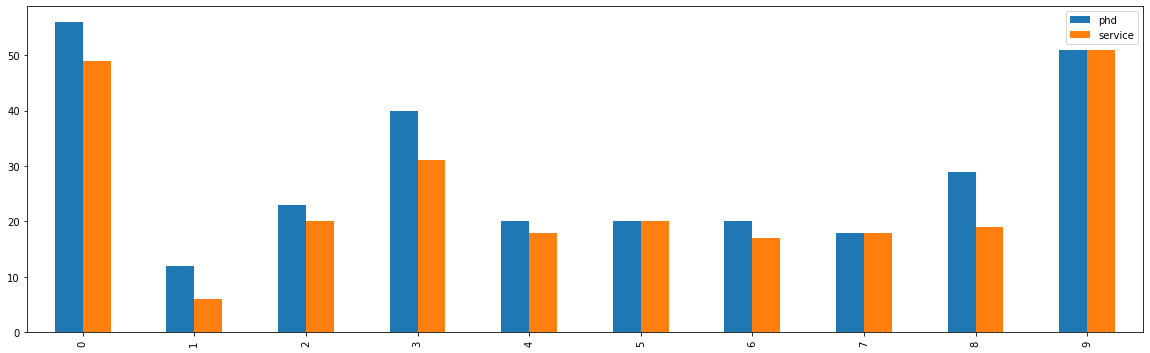

In [12]:
# Anda bisa juga plot 10 record data 'phd' dan 'service' beserta penempatan title/judul pada grafik tersebut
dataset[['phd','service']].head(10).plot.bar()

<AxesSubplot:title={'center':'Ph.D Vs Service\n 2018'}>

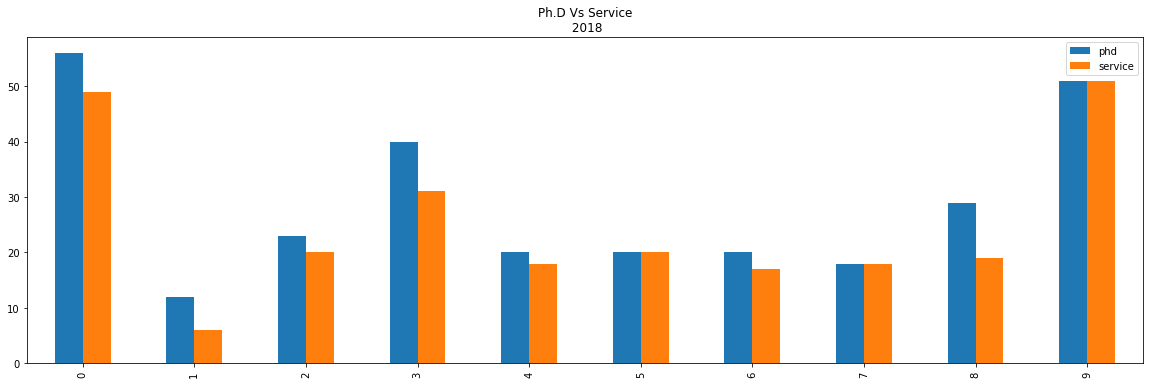

In [13]:
# dengan menambah title/judul pada grafik

dataset[['phd','service']].head(10).plot.bar(title="Ph.D Vs Service\n 2018")

<AxesSubplot:title={'center':'Ph.D Vs Service\n 2018'}>

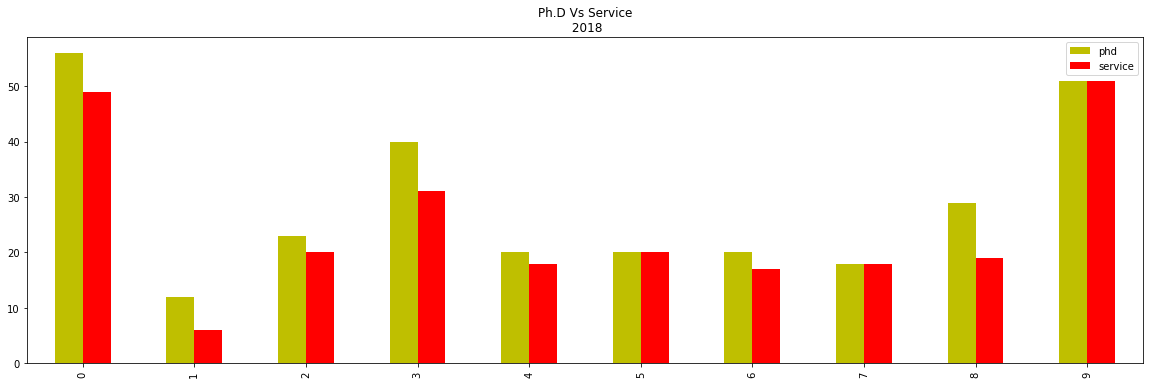

In [14]:
# Mensetting warna
dataset[['phd','service']].head(10).plot.bar(title="Ph.D Vs Service\n 2018", color=['y','r'])

+ Kita buat tampilan visualizing dengan pola grafik yang lain

# Pie Chart

<AxesSubplot:ylabel='salary'>

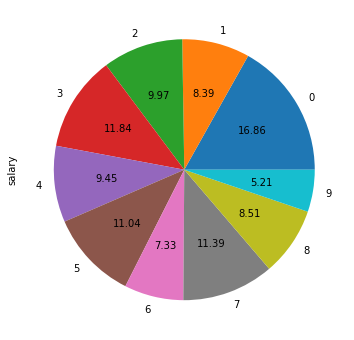

In [15]:
dataset['salary'].head(10).plot.pie(autopct='%.2f')

# Box Plot

<AxesSubplot:>

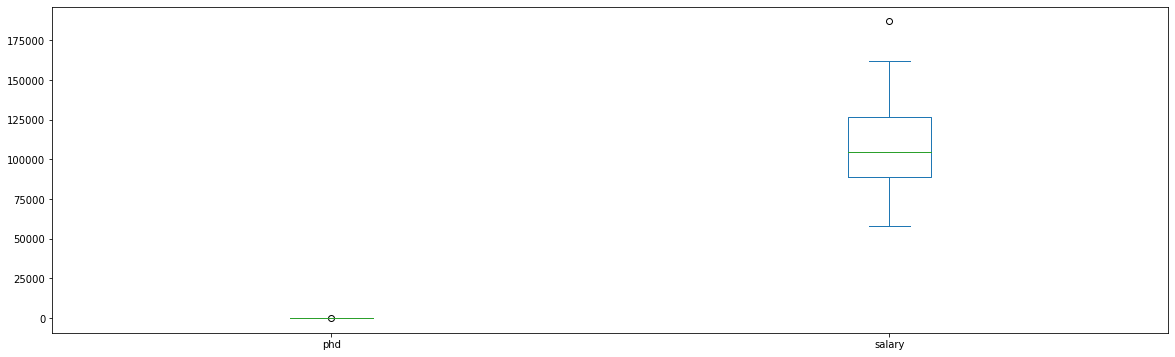

In [16]:
dataset[['phd','salary']].plot.box()

<AxesSubplot:>

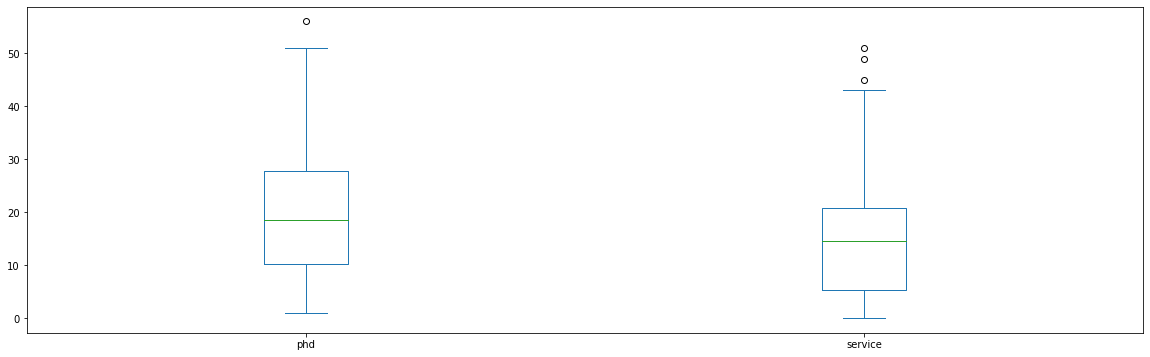

In [18]:
dataset[['phd','service']].plot.box()

# Histogram Plot

<AxesSubplot:ylabel='Frequency'>

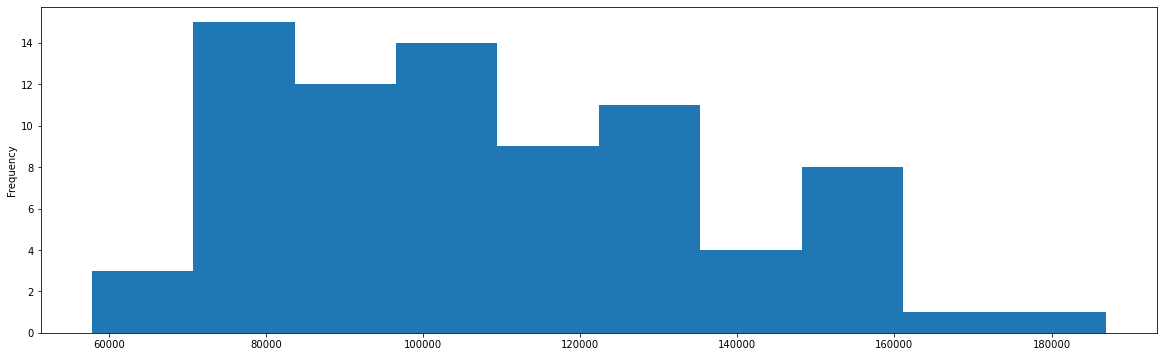

In [19]:
dataset['salary'].plot.hist()

# Sceter Plot

+ Digunakan untuk melihat korelasi antara 2 factor data experiment ( contoh di sini antara 'phd' vs 'service')

<AxesSubplot:title={'center':'Population Vs area and density\n 2018'}, xlabel='phd', ylabel='service'>

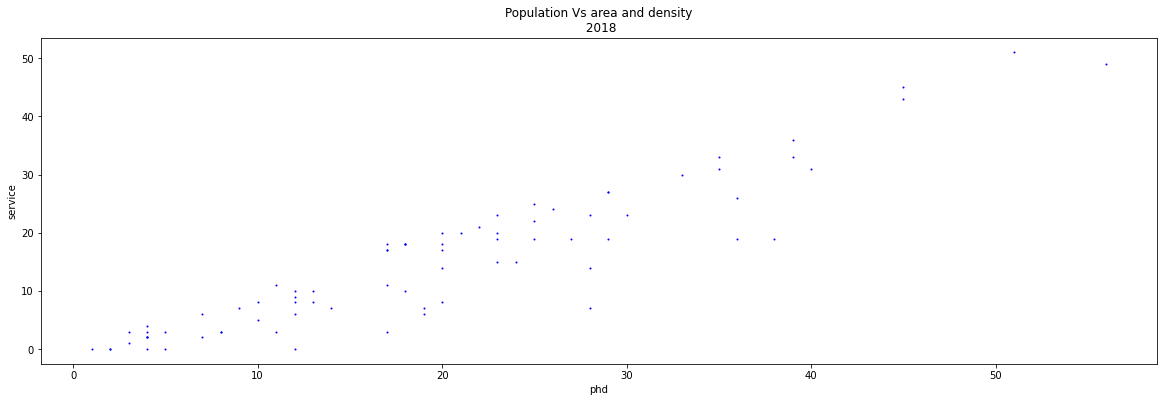

In [25]:
dataset.plot(kind='scatter', x='phd', y='service', title='Population Vs area and density\n 2018', s=0.99, color='b')

+ Kelihatan relasionshipnya hampir bisa di tebak cenderung liniear maka kedepan bisa di lakukan regresi linear untuk prediksinya

# Strip Plot

<AxesSubplot:xlabel='sex', ylabel='salary'>

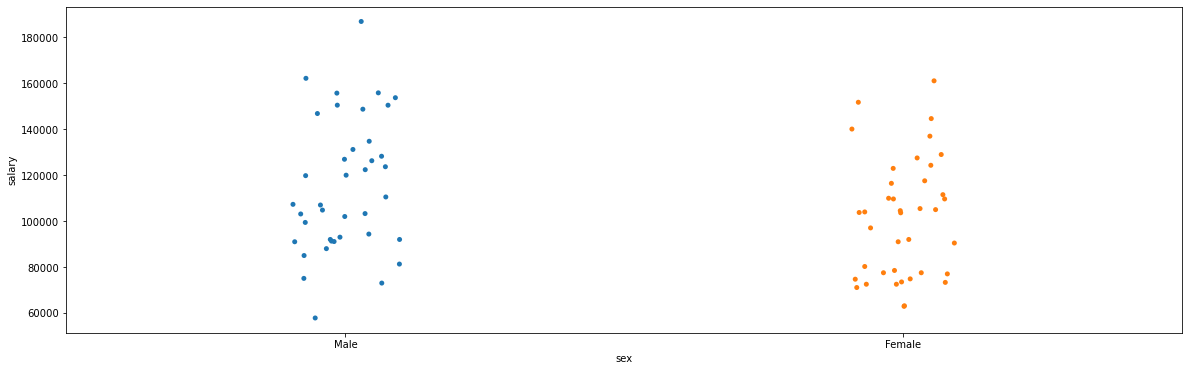

In [26]:
# Mari kita gunakan strip plot to display data per Salary category
# Jangan lupa import library terkait
import seaborn as sns
sns.stripplot( x= dataset['sex'], y=dataset['salary'], data=dataset, jitter=True)

<AxesSubplot:xlabel='rank', ylabel='salary'>

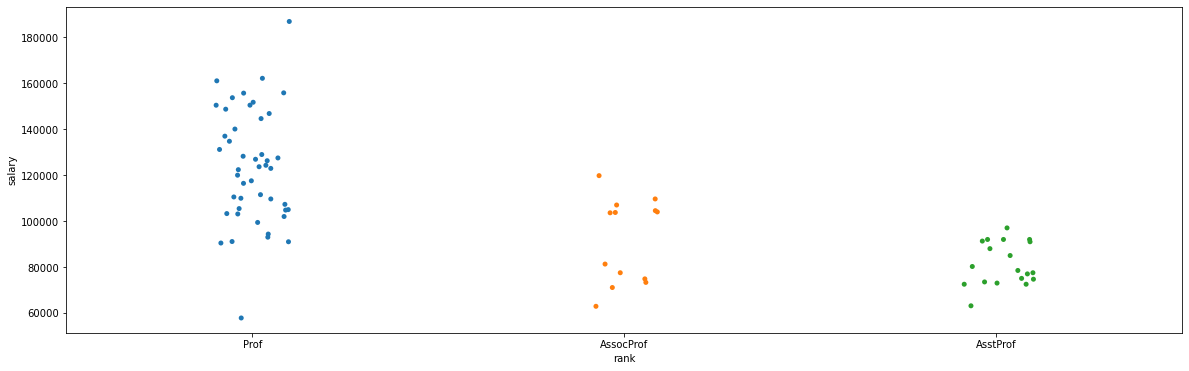

In [27]:
sns.stripplot( x= dataset['rank'], y=dataset['salary'], data=dataset, jitter=True)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

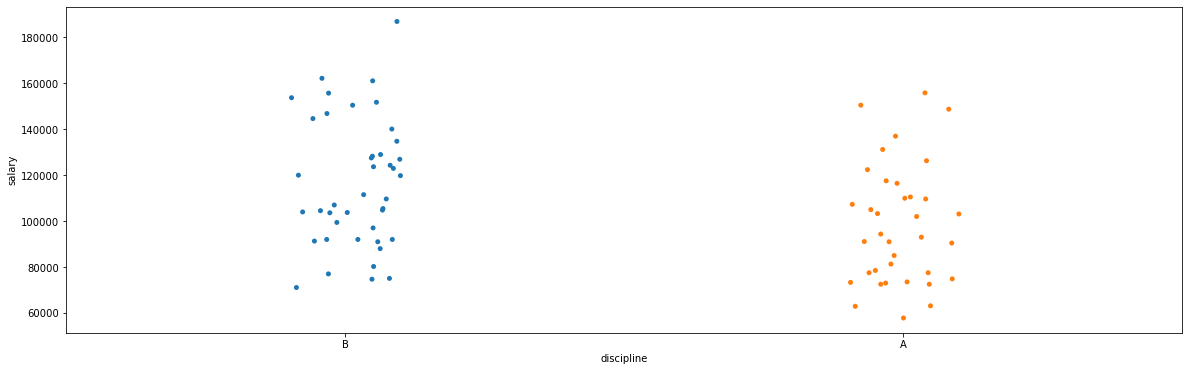

In [28]:
sns.stripplot( x= dataset['discipline'], y=dataset['salary'], data=dataset, jitter=True)

<AxesSubplot:xlabel='sex', ylabel='salary'>

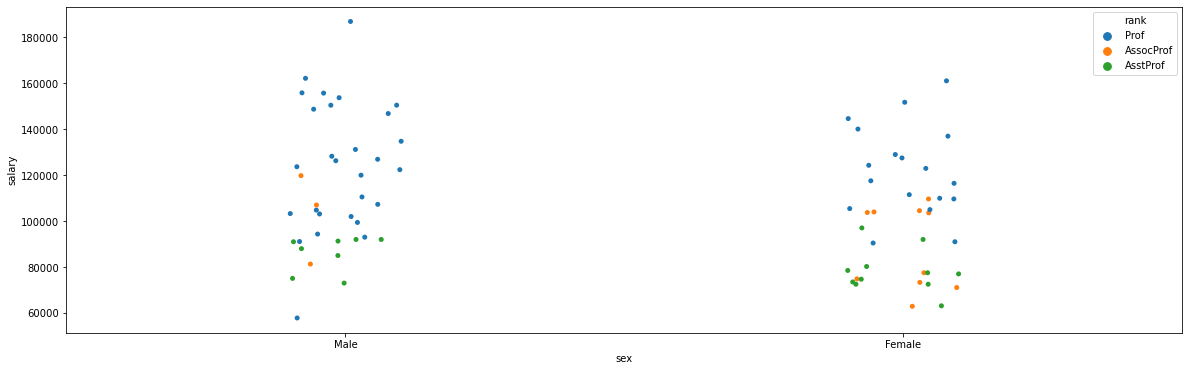

In [29]:
# Add hue to graph
sns.stripplot( x= 'sex', y='salary', hue='rank', data=dataset, jitter=True)

# Box Plot

<AxesSubplot:xlabel='salary', ylabel='sex'>

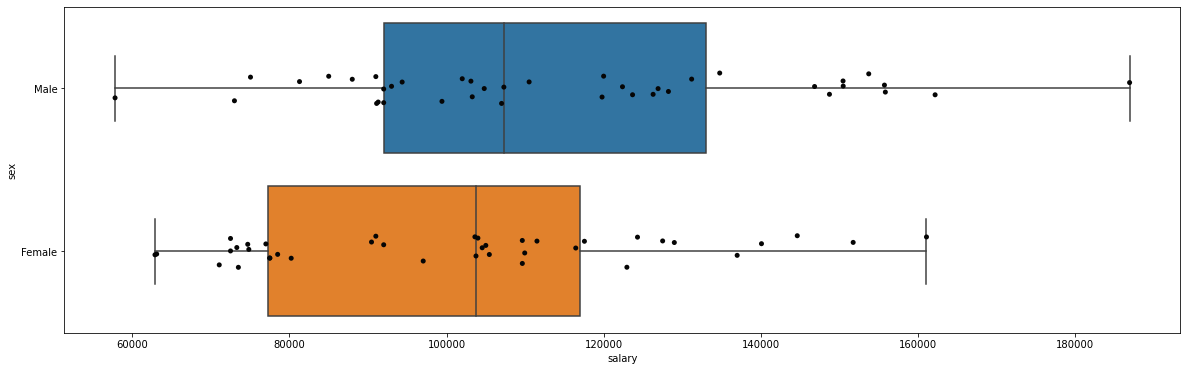

In [30]:
# Draw data on top boxplot

sns.boxplot(x = 'salary', y='sex', data=dataset, whis=np.inf)
sns.stripplot(x='salary', y='sex', data=dataset, jitter=True, color='0.02')

+ Kategori laki-laki memiliki gaji rata-rata lebih tinggi, gaji maks dan kisaran dibandingkan perempuan

<AxesSubplot:xlabel='rank', ylabel='salary'>

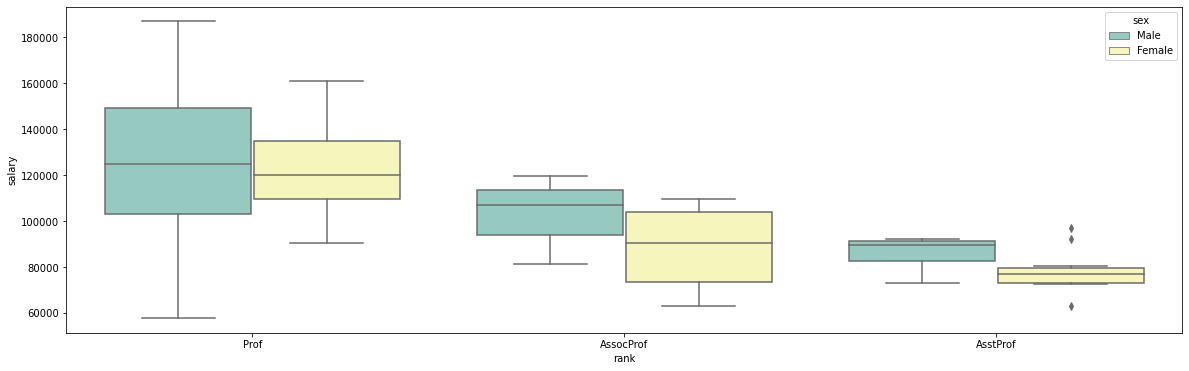

In [31]:
# box plot per rank
sns.boxplot(x='rank', y='salary', hue='sex', data=dataset, palette='Set3')

<AxesSubplot:xlabel='sex', ylabel='salary'>

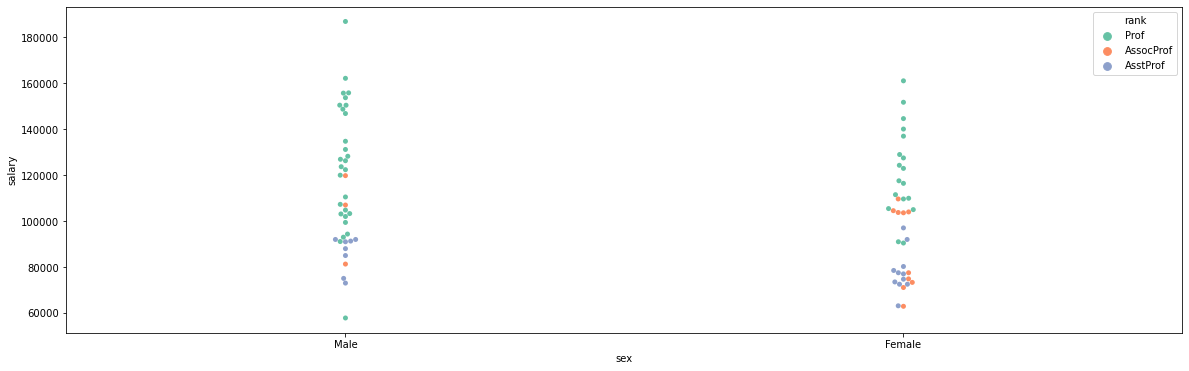

In [32]:
# Swamplot
sns.swarmplot(x='sex', y='salary', hue='rank', data=dataset, palette='Set2' )

# Joint Plot

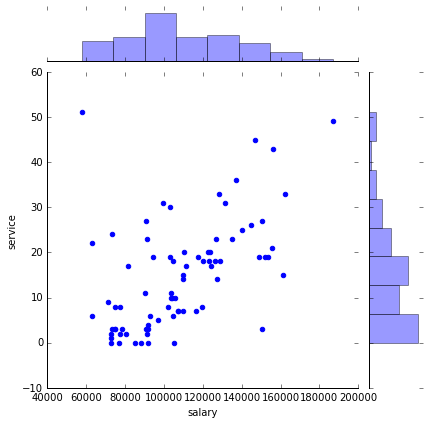

In [54]:
# Combination more than one plot to visualize 

sns.jointplot( x='salary', y='service', data=dataset)

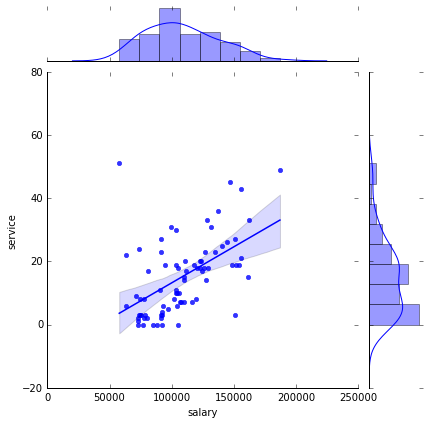

In [55]:
# Include regretion
sns.jointplot( x='salary', y='service', data=dataset, kind='reg')

# Matplotlib

+ Kita akan mengunakan library matplotlib dalam visualizing data:

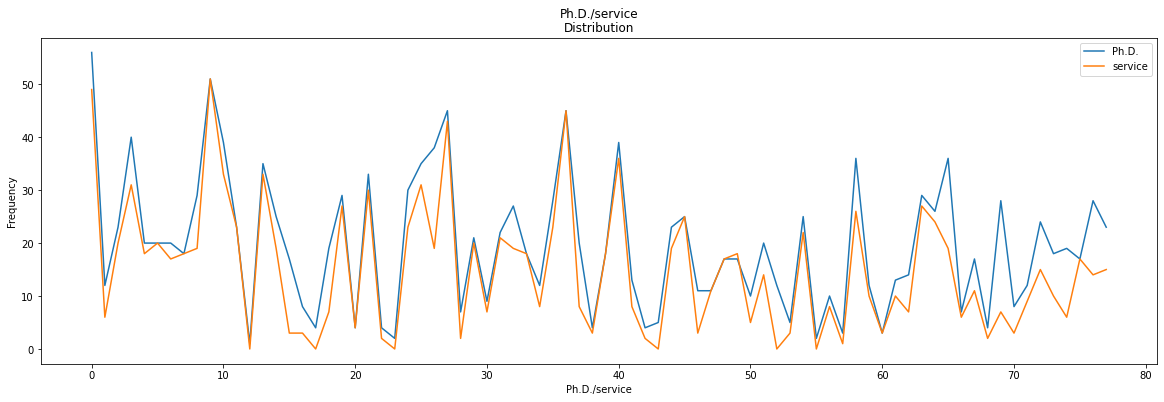

In [36]:
import matplotlib.pyplot as plt

plt.plot(phd, label='Ph.D.')        # menjadikan fature 'Ph.D' sebagai variable pengamatan
plt.plot(service, label='service')   # menjadikan fature 'service' sebagai variable pengamatan
plt.xlabel('Ph.D./service')          # menjadikan 'Ph.D/service' sebagai absis/ sumbu (x) grafik kartesian  
plt.ylabel('Frequency')              # menjadikan 'Frequency' sebagai ordinat/ sumbu (y) grafik kartesian  
plt.title('Ph.D./service\nDistribution') # menulis Judul grafik 
plt.legend()                             # menampilkan legend grafik tsb
plt.show()

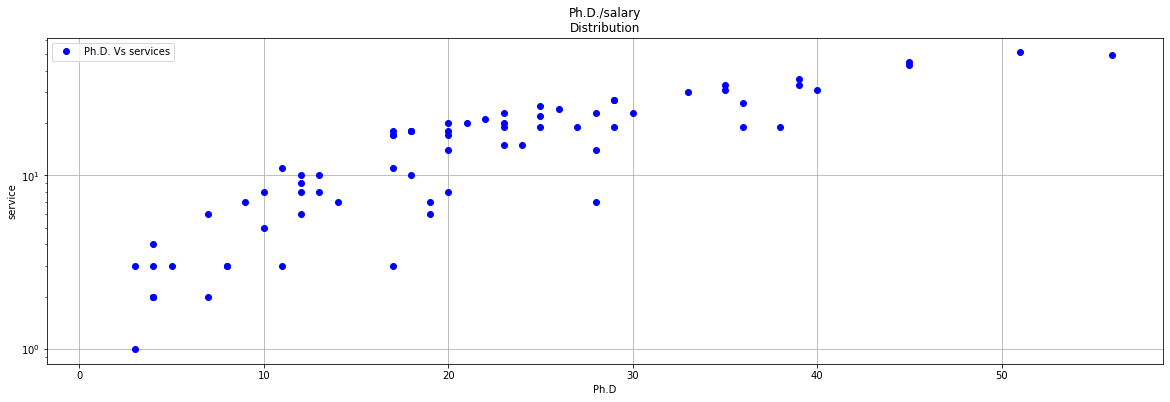

In [37]:
plt.plot(phd, service, 'bo', label="Ph.D. Vs services", lw=10) # mencetak grafik dalam mode logaritmic orde 10
plt.grid()
plt.legend()
plt.xlabel('Ph.D')
plt.ylabel('service')
plt.title('Ph.D./salary\nDistribution')
plt.yscale('log')

+ Kita pelajari cara membuat diagram batang untuk mempresentasikan siswa yang terdaftar untuk kursus; ada dua mahasiswa yang mendaftar untuk empat mata kuliah.

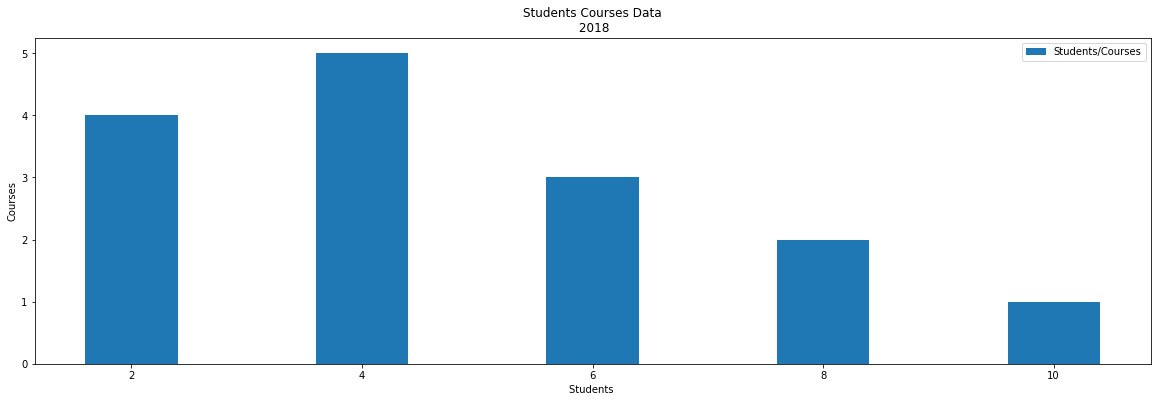

In [39]:
Students = [2,4,6,8,10]   # list of data student
Courses = [4,5,3,2,1]     # list of jumlah course yang di ambil oleh student tsb
plt.bar(Students,Courses, label="Students/Courses") # memploting dalam grafik Bar jumlah studen vs course yang di ambil
plt.xlabel('Students ')
plt.ylabel('Courses')
plt.title('Students Courses Data\n 2018')
plt.legend()
plt.show()

+ Jika variable yang akan kita tampilkan ada lebih dari 1 

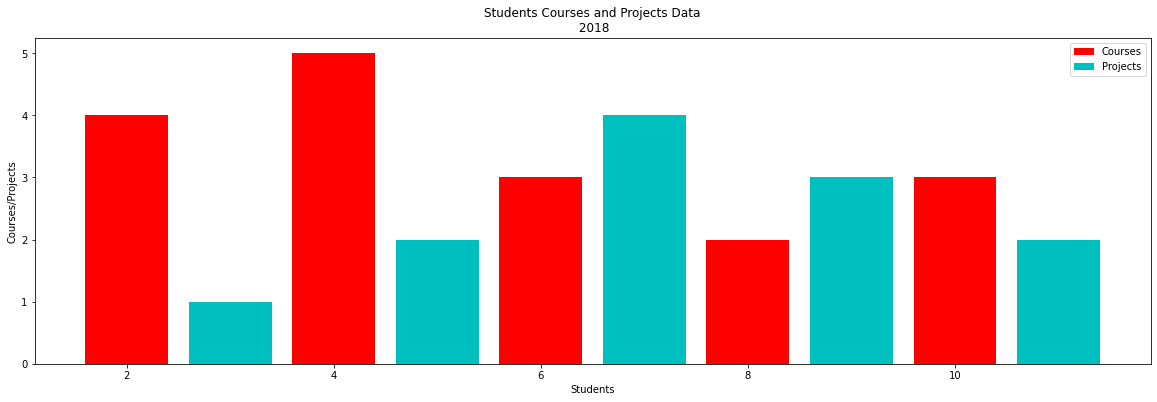

In [40]:
Students = [2,4,6,8,10]
Courses = [4,5,3,2,3]
stds = [3,5,7,9,11]
Projects = [1,2,4,3,2]
plt.bar(Students, Courses, label="Courses", color='r')
plt.bar(stds, Projects, label="Projects", color='c')
plt.xlabel('Students')
plt.ylabel('Courses/Projects')
plt.title('Students Courses and Projects Data\n 2018')
plt.legend()
plt.show()

# Histogram Plot

+ Kita akan latihan membuat grafik histogram yang menunjukan age frequencies; most people in dataset usia antara 30 - 40 tahun

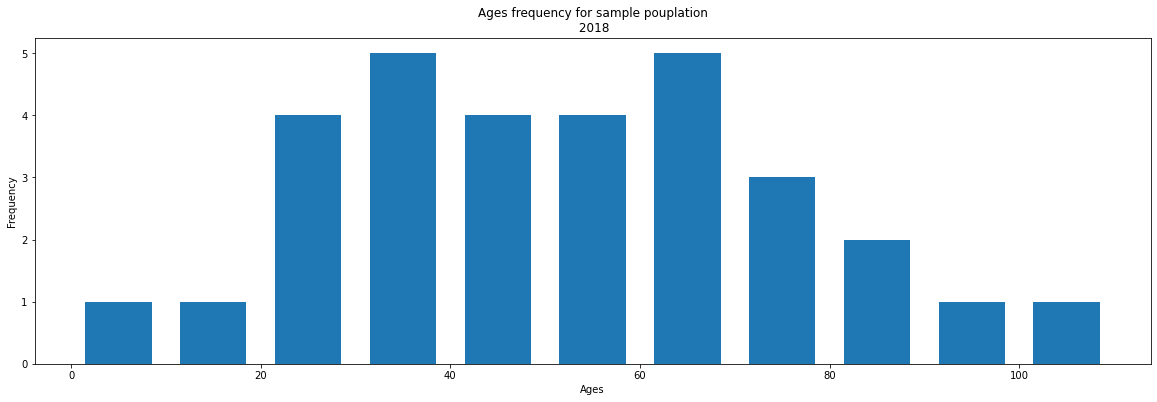

In [38]:
Ages = [22.5, 10, 55, 8, 62, 45, 21, 34, 42, 45, 99,75, 82,77, 55, 43, 66, 66, 78, 89, 101, 34, 65, 56,25, 34,52, 25, 63, 37, 32]
binsx = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.hist(Ages, bins=binsx, histtype='bar', rwidth=0.7)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Ages frequency for sample pouplation\n 2018')
plt.show()

# Mempertajam latihan penggunaan matplotlib

+ Buat 500 pembacaan suhu acak untuk enam kota selama satu musim, lalu plot data yang dihasilkan menggunakan Matplotlib.

In [41]:
# Ini beberapa library yang terlibat:

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [42]:
# Create temperature data
rng = np.random.RandomState(0)
season1 = np.cumsum(rng.randn(500, 6), 0)

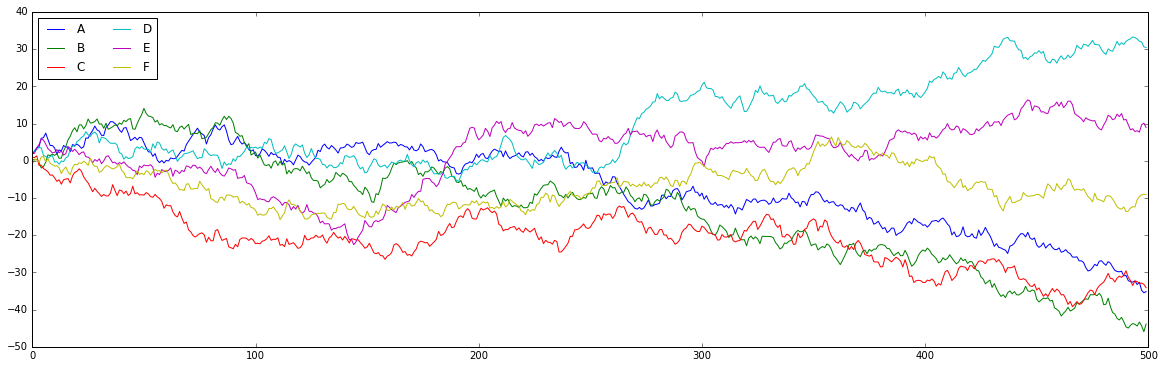

In [56]:
# Plot the data with Matplotlib defaults
plt.plot(season1)
plt.legend('ABCDEF', ncol=2, loc='upper left'); # menampilkan grafik temperature utuk variasi city ' ABCDE dan F'

+ Muat kumpulan data Iris terkenal, yang mencantumkan pengukuran kelopak dan sepal dari tiga spesies iris. Kemudian plot korelasi antara setiap pasangan menggunakan metode .pairplot().

/Users/mac/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


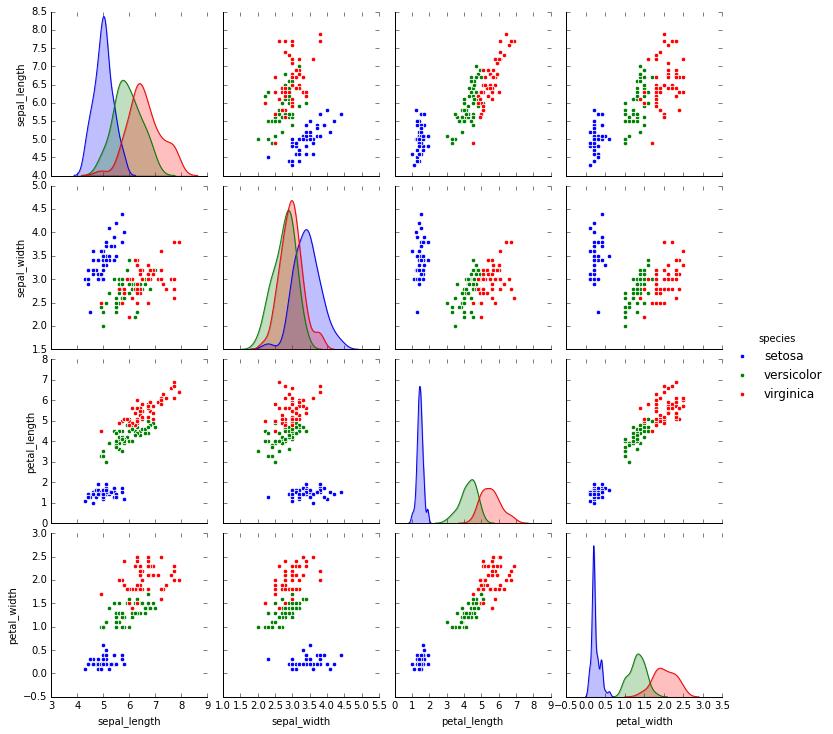

In [57]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()
sns.pairplot(iris, hue='species', size=2.5);

+ Memuat kumpulan data Tip terkenal, yang menunjukkan jumlah tip yang diterima oleh staf restoran berdasarkan berbagai data indikator; kemudian plot persentase tip per tagihan menurut jenis kelamin staf.

In [47]:
 import seaborn as sns
 tips = sns.load_dataset('tips')
 tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


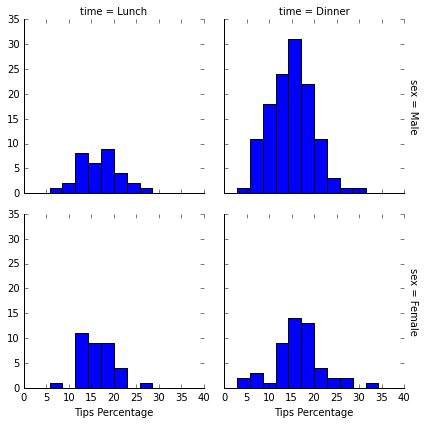

In [62]:
tips['Tips Percentage'] = 100 * tips['tip'] /tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time",
margin_titles=True)
grid.map(plt.hist, "Tips Percentage", bins=np.
linspace(0, 40, 15));

+ Memuat kumpulan data Tip terkenal, yang menunjukkan jumlah tip yang diterima oleh staf restoran berdasarkan berbagai data indikator; kemudian terapkan plot faktor untuk memvisualisasikan total tagihan per hari menurut jenis kelamin staf

/Users/mac/.local/lib/python3.9/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


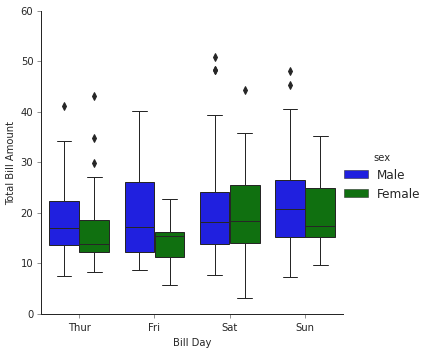

In [63]:
# Implementing Factor Plotting
import seaborn as sns
tips = sns.load_dataset('tips') 
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill","sex", data=tips, kind="box")
g.set_axis_labels("Bill Day", "Total Bill Amount")